In [20]:
import pandas as pd
import numpy as np

subpath = "agg_function_periodic_experiment_y_original_k_fold/2025-02-17T22:21:53"
data = pd.read_csv(f'{subpath}/minimal_with_univariate.csv', index_col=False)
data

,período,função,carga,apps,feature,método,nmae
0,256,média,FlashcrowdLoad,BothApps,DispFrames,RT,0.080605
1,256,média,FlashcrowdLoad,BothApps,DispFrames,RF,0.101910
2,256,máximo,FlashcrowdLoad,BothApps,DispFrames,RT,0.118388
3,256,máximo,FlashcrowdLoad,BothApps,DispFrames,RF,0.135684
4,256,mínimo,FlashcrowdLoad,BothApps,DispFrames,RT,0.117128
...,...,...,...,...,...,...,...
187,2,média,PeriodicLoad,SingleApp,DispFrames,RF,0.094862
188,2,máximo,PeriodicLoad,SingleApp,DispFrames,RT,0.100822
189,2,máximo,PeriodicLoad,SingleApp,DispFrames,RF,0.094653
190,2,mínimo,PeriodicLoad,SingleApp,DispFrames,RT,0.093948


In [21]:
#group = data.groupby(["período", "função"])['nmae'].agg(['mean', 'std']).reset_index()
group = data.groupby(["período"])['nmae'].agg(['mean', 'std']).reset_index()

In [22]:
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)

In [23]:
group

,período,mean,std
0,2,11.0,2.0
1,4,12.0,2.0
2,8,12.0,2.0
3,16,12.0,2.0
4,32,11.0,2.0
5,64,12.0,1.0
6,128,14.0,3.0
7,256,13.0,3.0


In [24]:
group = data.groupby(["período", "função"])['nmae'].agg(['mean', 'std']).reset_index()
group['std'] = round(100*group['std'], 0)
group['mean'] = round(100*group['mean'], 0)
group

,período,função,mean,std
0,2,máximo,11.0,1.0
1,2,média,11.0,2.0
2,2,mínimo,11.0,2.0
3,4,máximo,11.0,2.0
4,4,média,11.0,2.0
5,4,mínimo,12.0,2.0
6,8,máximo,12.0,2.0
7,8,média,12.0,3.0
8,8,mínimo,12.0,2.0
9,16,máximo,12.0,2.0


In [28]:
group[group['função'] == 'mínimo']

,período,função,mean,std
2,2,mínimo,11.0,2.0
5,4,mínimo,12.0,2.0
8,8,mínimo,12.0,2.0
11,16,mínimo,12.0,2.0
14,32,mínimo,11.0,2.0
17,64,mínimo,12.0,1.0
20,128,mínimo,14.0,4.0
23,256,mínimo,14.0,5.0


In [6]:
new_data = pd.DataFrame({'período': [1,1,1], 'função': ["média", "máximo", "mínimo"], 'mean': [11,11,11], 'std': [2,2,2]},
                        )

total_table = pd.concat([group, new_data], ignore_index=True)


In [7]:
total_table.set_index('período', inplace=True)

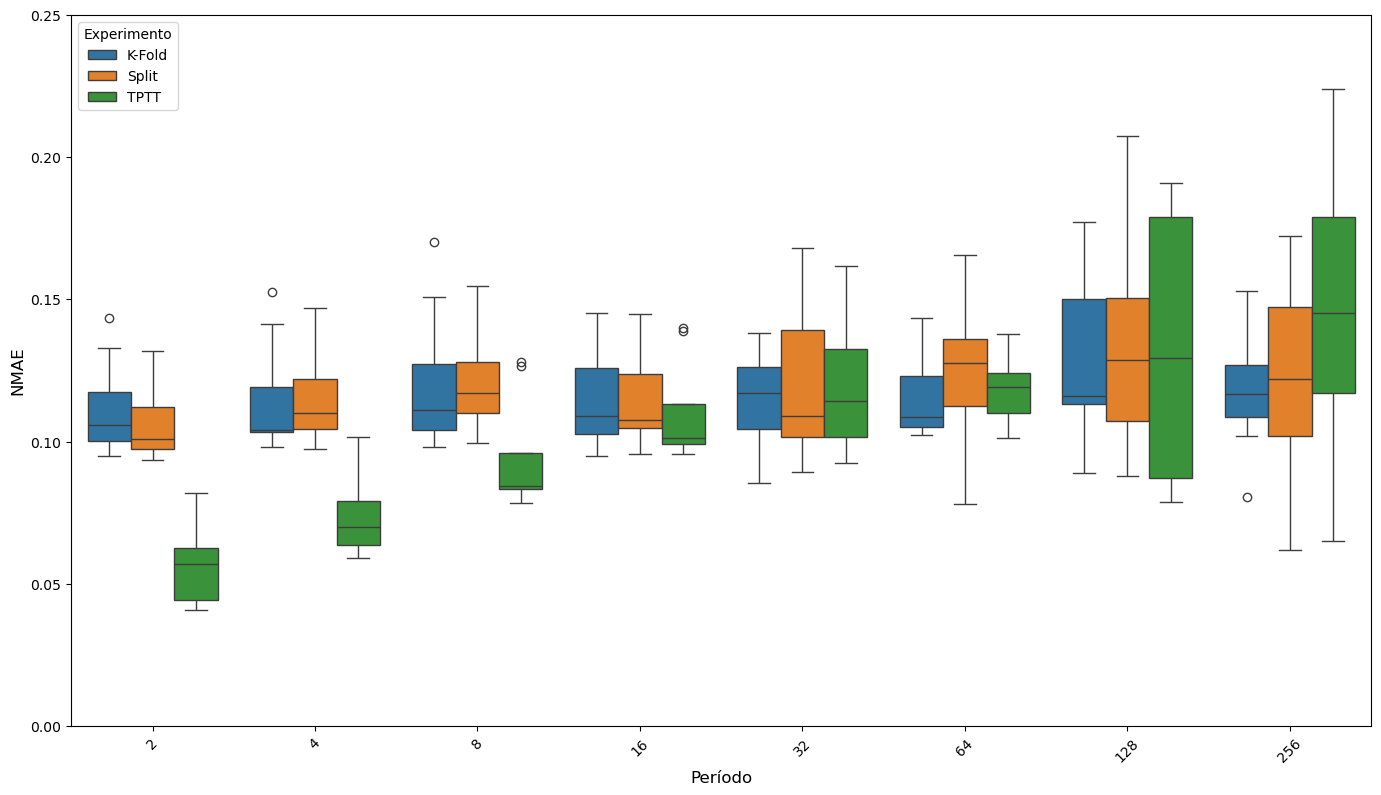

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

reference_split = pd.read_csv(f'agg_function_periodic_experiment_y_original/2025-01-06T17:07:48/minimal_with_univariate.csv', index_col=False)
reference_tptt = pd.read_csv(f'agg_function_periodic_experiment_y_original_tptt/2025-01-20T19:47:13/minimal_with_univariate.csv', index_col=False)
data['Experimento'] = 'K-Fold'
reference_split['Experimento'] = 'Split'
reference_tptt['Experimento'] = 'TPTT'
data_combined = pd.concat([data, reference_split,  reference_tptt], ignore_index=True)




y_limits = (0, 0.25)
plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined[data_combined['função'] == 'média'], hue='Experimento')

plt.xlabel("Período", fontsize=12)
plt.ylabel("NMAE", fontsize=12)
#plt.title("NMAE Janelas de Funções por período", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.ylim(y_limits)
plt.show()

/tmp/ipykernel_142764/2199695096.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media['Caso'] = 'Média - Seleção de Caraterísticas'
/tmp/ipykernel_142764/2199695096.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  media_sem_fs['Caso'] = 'Média'


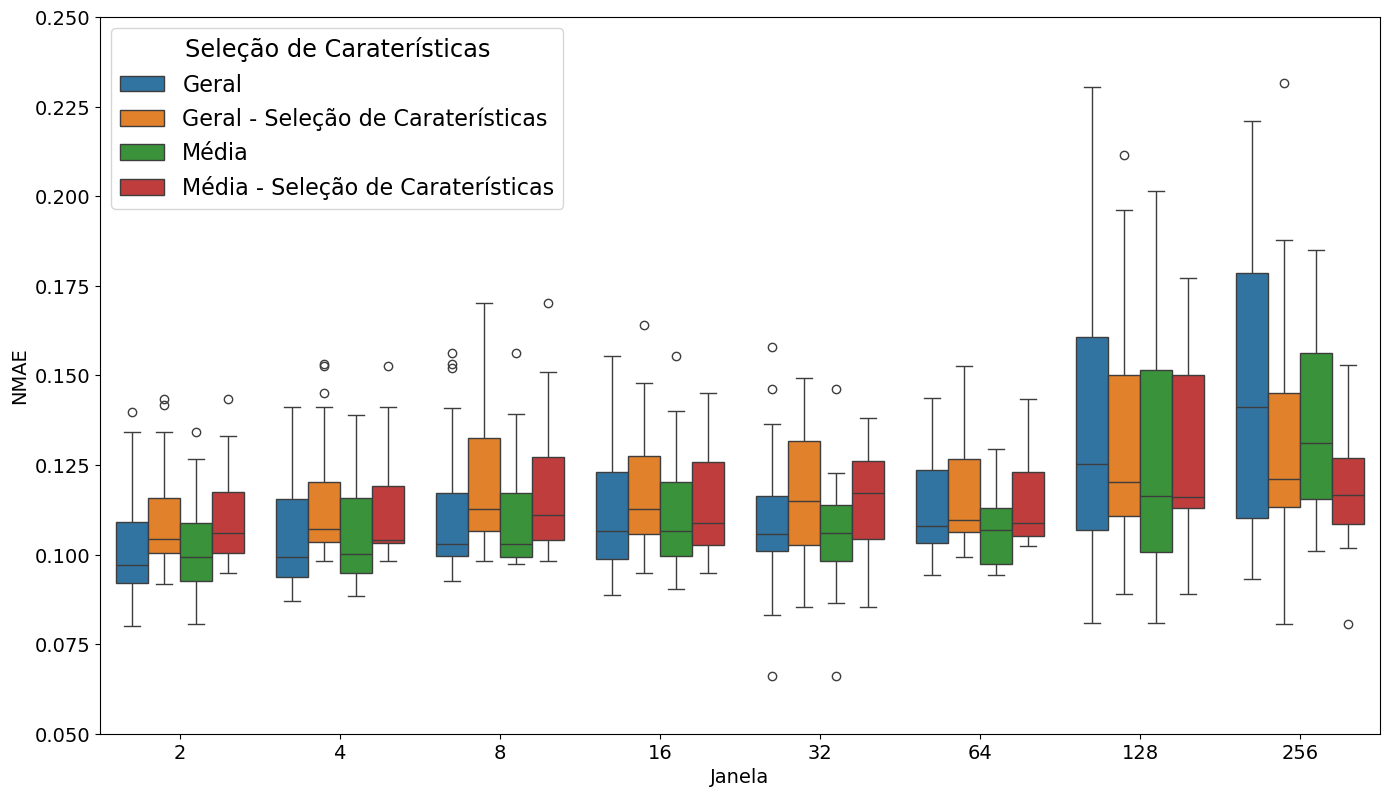

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

total_X = pd.read_csv(f'agg_function_periodic_experiment_y_original_k_fold/2025-02-17T22:21:53/total_X.csv', index_col=False)

data['Caso'] = 'Geral - Seleção de Caraterísticas'
total_X['Caso'] = 'Geral'
media = data[data['função'] == 'média']
media['Caso'] = 'Média - Seleção de Caraterísticas'
media_sem_fs = total_X[total_X['função'] == 'média']
media_sem_fs['Caso'] = 'Média'


data_combined = pd.concat([total_X, data, media_sem_fs, media], ignore_index=True)



y_limits = (0.05, 0.25)
plt.figure(figsize=(14, 8))
sns.boxplot(x='período', y='nmae', data=data_combined, hue='Caso')

plt.xlabel("Janela", fontsize=14)
plt.ylabel("NMAE", fontsize=14)
#plt.title("NMAE Janelas de Funções por período", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.rcParams['legend.title_fontsize'] = 'xx-large'

plt.legend(title='Seleção de Caraterísticas', prop={'size': 16})

plt.tight_layout()


plt.ylim(y_limits)
plt.show()

In [10]:
group_by_method = data.groupby(["período", "método"])['nmae'].agg(['mean', 'std']).reset_index()

In [11]:
group_by_method['std'] = round(100*group_by_method['std'], 0)
group_by_method['mean'] = round(100*group_by_method['mean'], 0)

In [12]:
group_by_method

,período,método,mean,std
0,2,RF,6.0,1.0
1,2,RT,4.0,1.0
2,4,RF,7.0,1.0
3,4,RT,7.0,1.0
4,8,RF,9.0,2.0
5,8,RT,9.0,2.0
6,16,RF,11.0,2.0
7,16,RT,11.0,2.0
8,32,RF,11.0,2.0
9,32,RT,11.0,2.0


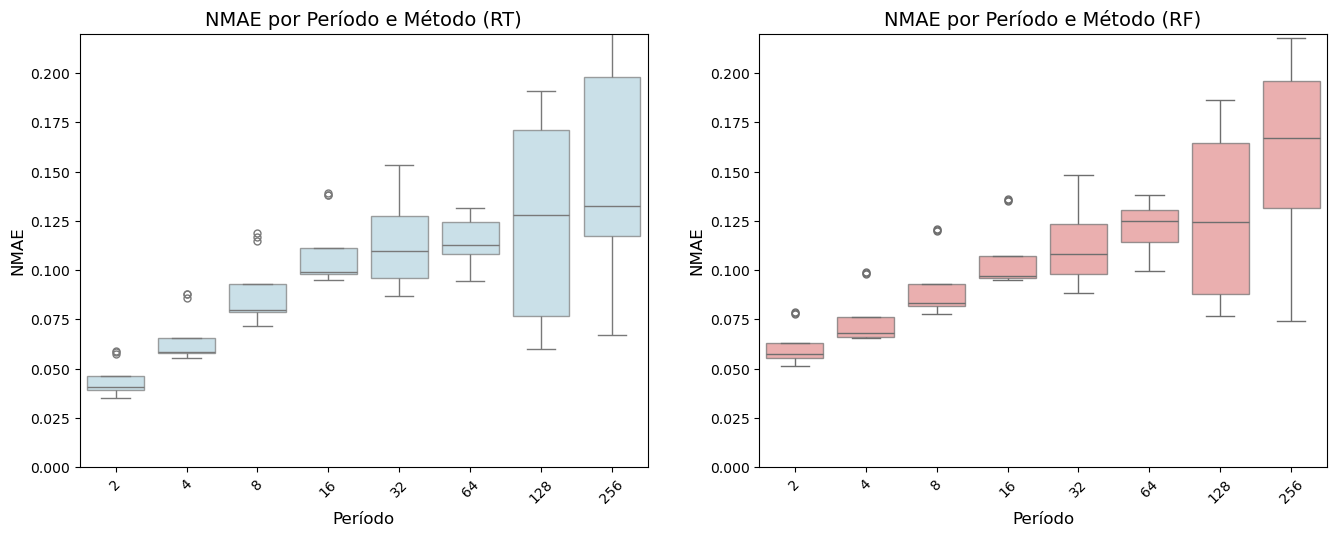

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

y_limits = (0, 0.22)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RT'],
            color="lightblue", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[0])
axes[0].set_ylim(y_limits)
axes[0].set_xlabel("Período", fontsize=12)
axes[0].set_ylabel("NMAE", fontsize=12)
axes[0].set_title("NMAE por Período e Método (RT)", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x='período', y='nmae', data=data[data['método'] == 'RF'],
            color="lightcoral", boxprops=dict(alpha=0.7), fliersize=5, ax=axes[1])
axes[1].set_ylim(y_limits)
axes[1].set_xlabel("Período", fontsize=12)
axes[1].set_ylabel("NMAE", fontsize=12)
axes[1].set_title("NMAE por Período e Método (RF)", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout(pad=3.0)

plt.show()
